In [4]:
# --- 1. Conectar a Google Drive ---
# Aparecerá una ventana para que autorices el acceso a tus archivos.
from google.colab import drive
drive.mount('/content/drive')
print("\n✅ Google Drive conectado exitosamente.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ Google Drive conectado exitosamente.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Carga Optimizada de Datos de Ambos Modelos ---

# Define las rutas a tus archivos de resultados
DRIVE_PROJECT_PATH = '/content/drive/MyDrive/TFM_Cienciometria'
TMP_DIR = os.path.join(DRIVE_PROJECT_PATH, 'data')
TMP_IMG = os.path.join(DRIVE_PROJECT_PATH, 'data/imagenes')
ruta_mathbert = os.path.join(DRIVE_PROJECT_PATH, 'data/mathbert/tmp/05_novelty_scores_mathbert_TODO_p0_5_10_20_k150000_m120_strict_pool50000.csv')
ruta_word2vec = os.path.join(DRIVE_PROJECT_PATH, 'data/word2vec/tmp/05_novelty_scores_word2vec_TODO_p0_5_10_20_k150000_m120_strict_pool50000.csv')

# --- OPTIMIZACIÓN ---
# Define solo las columnas que realmente necesitas para los gráficos
columnas_necesarias = [
    'title', 'cover_date', 'citedby_count', 'pool_size', 'doi', 'text',
    'novelty_p0', 'novelty_p5', 'novelty_p10', 'novelty_p20'
]

# Define tipos de datos más eficientes en memoria
tipos_de_datos = {
    'citedby_count': 'float32',
    'pool_size': 'float32',
    'novelty_p0': 'float32',
    'novelty_p5': 'float32',
    'novelty_p10': 'float32',
    'novelty_p20': 'float32'
}

# Carga los dataframes usando solo las columnas y tipos optimizados
try:
    df_mathbert = pd.read_csv(ruta_mathbert, usecols=columnas_necesarias, dtype=tipos_de_datos)
    df_word2vec = pd.read_csv(ruta_word2vec, usecols=columnas_necesarias, dtype=tipos_de_datos)
    print("✅ Archivos de resultados cargados de forma optimizada.")
except FileNotFoundError as e:
    print(f"❌ ERROR: No se pudo encontrar el archivo. Revisa las rutas. Detalle: {e}")


# --- 2. Preparación y Unificación del DataFrame ---

df_mathbert['modelo'] = 'MathBERT'
df_word2vec['modelo'] = 'Word2Vec'

df_completo = pd.concat([df_mathbert, df_word2vec], ignore_index=True)

# --- OPTIMIZACIÓN ---
# Convierte la columna 'modelo' a tipo 'category' para ahorrar memoria
df_completo['modelo'] = df_completo['modelo'].astype('category')

df_completo['anio'] = pd.to_datetime(df_completo['cover_date'], errors='coerce').dt.year
df_completo = df_completo.dropna(subset=['anio'])
df_completo['anio'] = df_completo['anio'].astype('int16') # int16 es suficiente para años

df_completo = df_completo[df_completo['anio'] >= 1900]

print(f"\n📊 DataFrame unificado y optimizado creado con {len(df_completo)} registros.")

✅ Archivos de resultados cargados de forma optimizada.

📊 DataFrame unificado y optimizado creado con 2427860 registros.


In [6]:
# --- Tabla 1: Top 0.1% de Artículos más Novedosos por Modelo (Percentil 20) ---

percentil_analisis = 'novelty_p20'

# Define las columnas y el orden para la salida final
columnas_a_mostrar = [
    "title",
    "novelty_p20",
    "citedby_count",
    "cover_date",
    "pool_size",
    "doi",
    "text"
]

# --- Para el modelo MathBERT ---
df_mathbert_subset = df_completo[df_completo['modelo'] == 'MathBERT']
n_mathbert = int(len(df_mathbert_subset) * 0.001)
top_mathbert = df_mathbert_subset.nlargest(n_mathbert, percentil_analisis)

# --- Para el modelo Word2Vec ---
df_word2vec_subset = df_completo[df_completo['modelo'] == 'Word2Vec']
n_word2vec = int(len(df_word2vec_subset) * 0.001)
top_word2vec = df_word2vec_subset.nlargest(n_word2vec, percentil_analisis)


# --- Visualización y Guardado de Resultados ---

# 1. MathBERT
print(f"🏆 TOP {n_mathbert} ARTÍCULOS MÁS NOVEDOSOS (el 0.1% de MathBERT)")
display(top_mathbert[columnas_a_mostrar])

# Guardar en CSV
ruta_guardado_mathbert = os.path.join(TMP_DIR, 'top_0.1_percent_mathbert.csv')
top_mathbert[columnas_a_mostrar].to_csv(ruta_guardado_mathbert, index=False)
print(f"✅ Archivo guardado en: {ruta_guardado_mathbert}")


# 2. Word2Vec
print(f"\n🏆 TOP {n_word2vec} ARTÍCULOS MÁS NOVEDOSOS (el 0.1% de Word2Vec)")
display(top_word2vec[columnas_a_mostrar])

# Guardar en CSV
ruta_guardado_word2vec = os.path.join(TMP_DIR, 'top_0.1_percent_word2vec.csv')
top_word2vec[columnas_a_mostrar].to_csv(ruta_guardado_word2vec, index=False)
print(f"✅ Archivo guardado en: {ruta_guardado_word2vec}")

🏆 TOP 1213 ARTÍCULOS MÁS NOVEDOSOS (el 0.1% de MathBERT)


,title,novelty_p20,citedby_count,cover_date,pool_size,doi,text
808170,Ray class field of prime conductor of a real q...,0.730957,2.0,2004-01-01,150000.0,10.3792/pjaa.80.83,Ray class field of prime conductor of a real q...
834559,Graphs characterized by Laplacian eigenvalues,0.729492,4.0,2004-09-22,150000.0,10.1142/S025295990400010X,Graphs characterized by Laplacian eigenvalues....
586041,The point space of compact generalized quadran...,0.726074,1.0,2000-01-01,150000.0,10.1515/form.2000.012,The point space of compact generalized quadran...
919568,PAC fields over number fields,0.725586,4.0,2006-01-01,150000.0,10.5802/jtnb.550,PAC fields over number fields. We prove that i...
765121,The Lie algebra of a nuclear group,0.725098,3.0,2003-07-17,150000.0,NaN,The Lie algebra of a nuclear group. The Lie al...
...,...,...,...,...,...,...,...
817105,Irreducible representations of quantum 3 × 3 m...,0.664062,0.0,2004-03-01,150000.0,10.1023/B:SIMJ.0000021281.63524.08,Irreducible representations of quantum 3 × 3 m...
833381,Stochastic processes on classifying spaces and...,0.664062,0.0,2004-09-01,150000.0,10.1142/S0219025704001700,Stochastic processes on classifying spaces and...
834357,K-theory and derived equivalences,0.664062,59.0,2004-09-15,150000.0,10.1215/S0012-7094-04-12435-2,K-theory and derived equivalences. We show tha...
844146,On smooth third order trigonometric splines,0.664062,1.0,2004-12-01,150000.0,NaN,On smooth third order trigonometric splines. T...


✅ Archivo guardado en: /content/drive/MyDrive/TFM_Cienciometria/data/top_0.1_percent_mathbert.csv

🏆 TOP 1213 ARTÍCULOS MÁS NOVEDOSOS (el 0.1% de Word2Vec)


,title,novelty_p20,citedby_count,cover_date,pool_size,doi,text
1876748,Remembering Gordon Pask,0.621094,0.0,2001-10-01,150000.0,10.1108/03684920110396855,Remembering Gordon Pask. It was a rare pleasur...
1464461,The niagara cipher - part ii,0.620605,0.0,1990-01-01,143591.0,10.1080/0161-119091864904,The niagara cipher - part ii. Cryptanalysis of...
2274145,On the Hyers-Ulam-Rassias stability of the Bi-...,0.620605,6.0,2008-01-01,150000.0,10.5666/KMJ.2008.48.4.705,On the Hyers-Ulam-Rassias stability of the Bi-...
1678366,The first naval enigma decrypts of world war II,0.611328,3.0,1997-01-01,150000.0,10.1080/0161-119791885760,The first naval enigma decrypts of world war I...
1985806,Brigadier john tiltman: One of britain’s fines...,0.611328,17.0,2003-10-01,150000.0,10.1080/0161-110391891928,Brigadier john tiltman: One of britain’s fines...
...,...,...,...,...,...,...,...
1948917,Analysis on Traceability on Stadier et al.'s F...,0.487305,2.0,2003-01-01,150000.0,NaN,Analysis on Traceability on Stadier et al.'s F...
1984895,On the polynomial-space completeness of intuit...,0.487305,15.0,2003-10-01,150000.0,10.1007/s00153-003-0179-x,On the polynomial-space completeness of intuit...
2092783,Copernicus decoded,0.487305,0.0,2005-06-01,150000.0,10.1007/BF02985834,Copernicus decoded. To the spirit of Niklas Ko...
2145381,A Kripke-style and relational semantics for lo...,0.487305,2.0,2006-04-14,150000.0,NaN,A Kripke-style and relational semantics for lo...


✅ Archivo guardado en: /content/drive/MyDrive/TFM_Cienciometria/data/top_0.1_percent_word2vec.csv


✅ Gráfico 1 guardado.


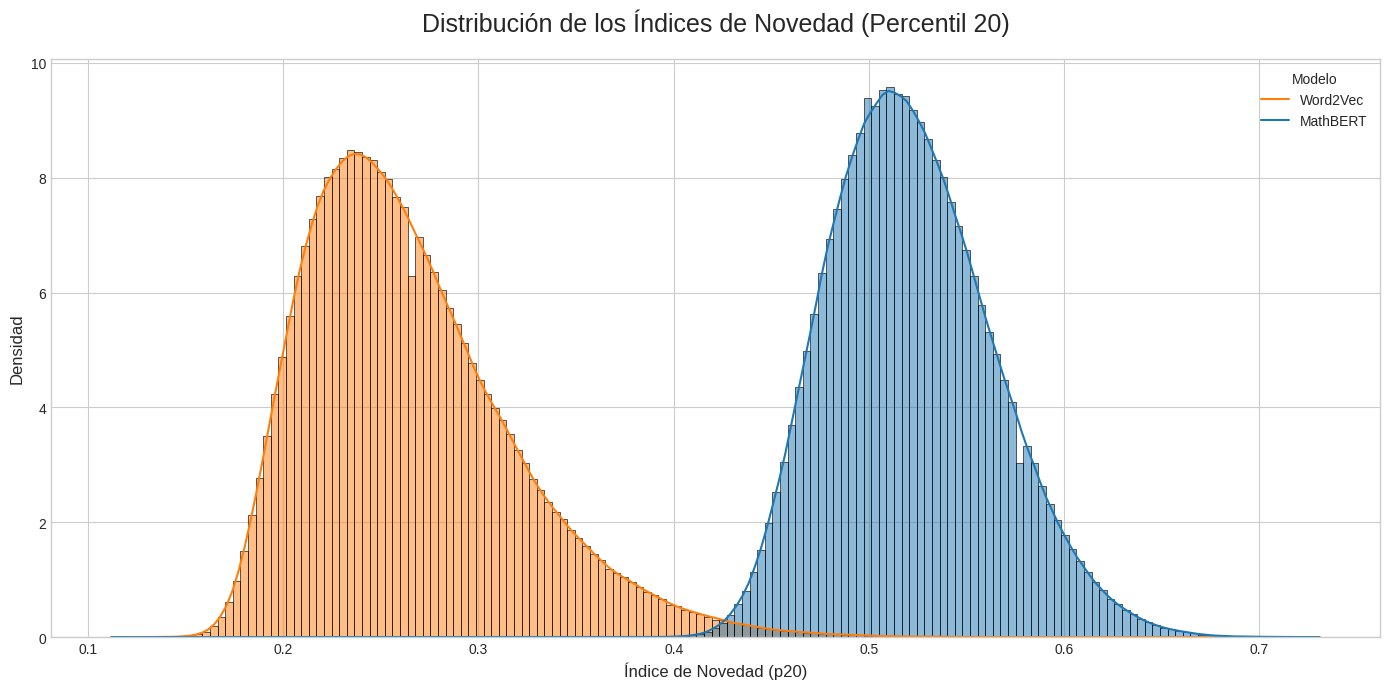

In [7]:
# --- Gráfico 1: Histograma Comparativo de la Distribución de Novedad (Percentil 20) ---

# Configurar el gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Graficar un histograma con una curva de densidad (KDE) para cada modelo
sns.histplot(
    data=df_completo,
    x='novelty_p20',
    hue='modelo',
    kde=True, # Añade la línea de densidad
    stat='density', # Normaliza los histogramas para que el área bajo la curva sea 1
    common_norm=False, # Cada histograma se normaliza de forma independiente
    palette=['#1f77b4', '#ff7f0e'],
    ax=ax
)

# Títulos y etiquetas
ax.set_title('Distribución de los Índices de Novedad (Percentil 20)', fontsize=18, pad=20)
ax.set_xlabel('Índice de Novedad (p20)', fontsize=12)
ax.set_ylabel('Densidad', fontsize=12)
ax.legend(title='Modelo', labels=['Word2Vec', 'MathBERT'])
plt.tight_layout()
# --- GUARDAR IMAGEN 1 ---
plt.savefig(os.path.join(TMP_IMG, '01_distribucion_novedad.png'), dpi=150, bbox_inches='tight')
print("✅ Gráfico 1 guardado.")
plt.show()

/tmp/ipython-input-1878711039.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_anual = df_completo.groupby(['anio', 'modelo'])[percentiles].mean().reset_index()


✅ Gráfico 2 guardado.


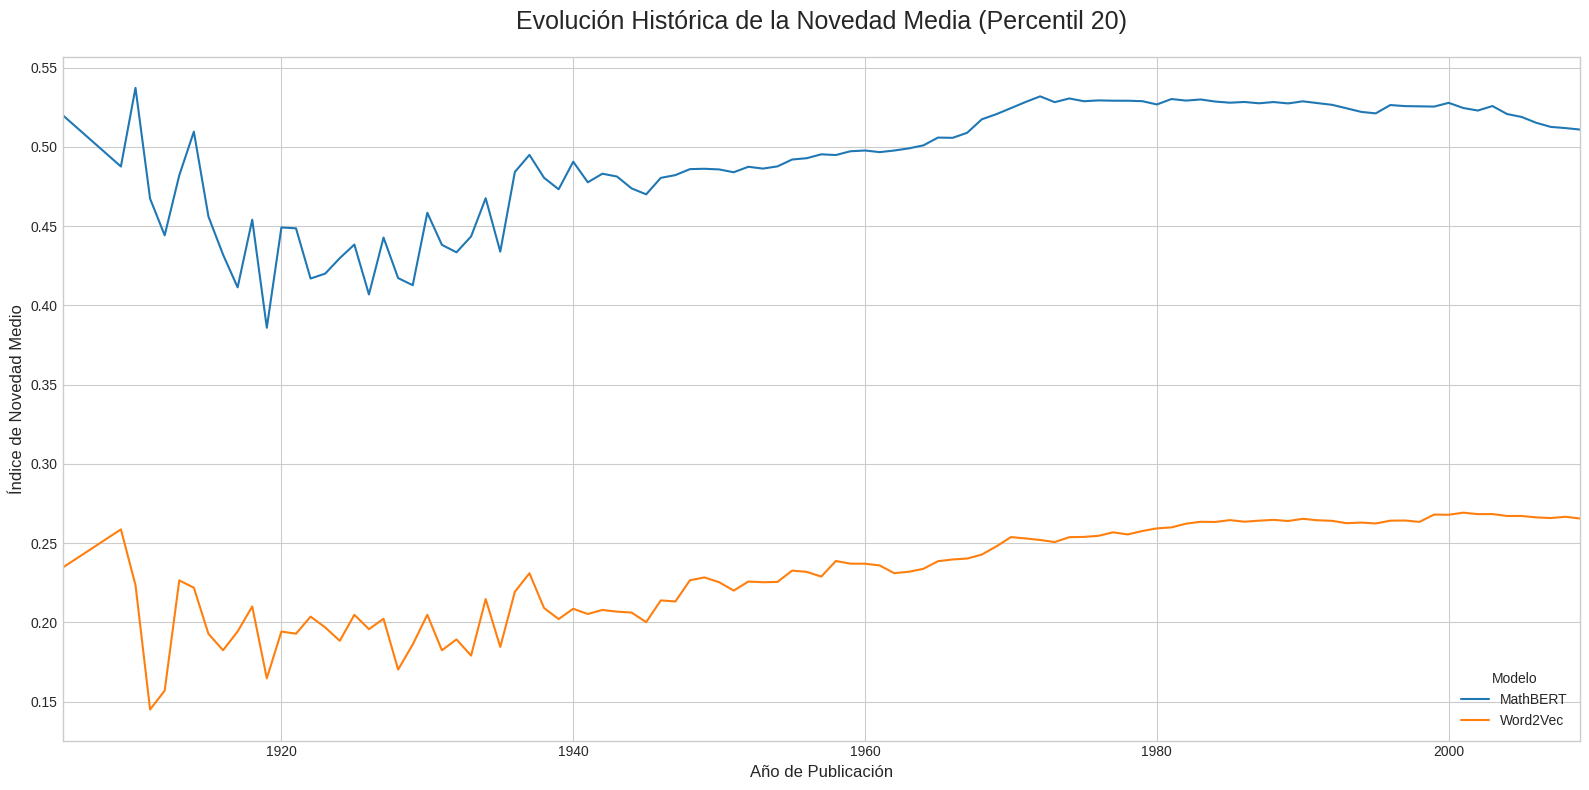

In [8]:
# --- Gráfico 2: Evolución Histórica Comparativa de la Novedad ---

# Agrupar por año y modelo para calcular la media de novedad
percentiles = ['novelty_p0', 'novelty_p5', 'novelty_p10', 'novelty_p20']
df_anual = df_completo.groupby(['anio', 'modelo'])[percentiles].mean().reset_index()

# Configurar el gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 8))

# Graficar la evolución de la novedad para el percentil 20 (puedes cambiarlo)
sns.lineplot(data=df_anual, x='anio', y='novelty_p20', hue='modelo', ax=ax, palette=['#1f77b4', '#ff7f0e'])

# Títulos y etiquetas
ax.set_title('Evolución Histórica de la Novedad Media (Percentil 20)', fontsize=18, pad=20)
ax.set_xlabel('Año de Publicación', fontsize=12)
ax.set_ylabel('Índice de Novedad Medio', fontsize=12)
ax.legend(title='Modelo')
ax.set_xlim(df_anual['anio'].min(), df_anual['anio'].max())
plt.tight_layout()
# --- GUARDAR IMAGEN 2 ---
plt.savefig(os.path.join(TMP_IMG, '02_evolucion_temporal_novedad.png'), dpi=150, bbox_inches='tight')
print("✅ Gráfico 2 guardado.")
plt.show()

/tmp/ipython-input-301576734.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tendencia = df_citas.groupby(['novedad_bin', 'modelo'])['log_citas'].mean().reset_index()


✅ Gráfico 3 guardado.


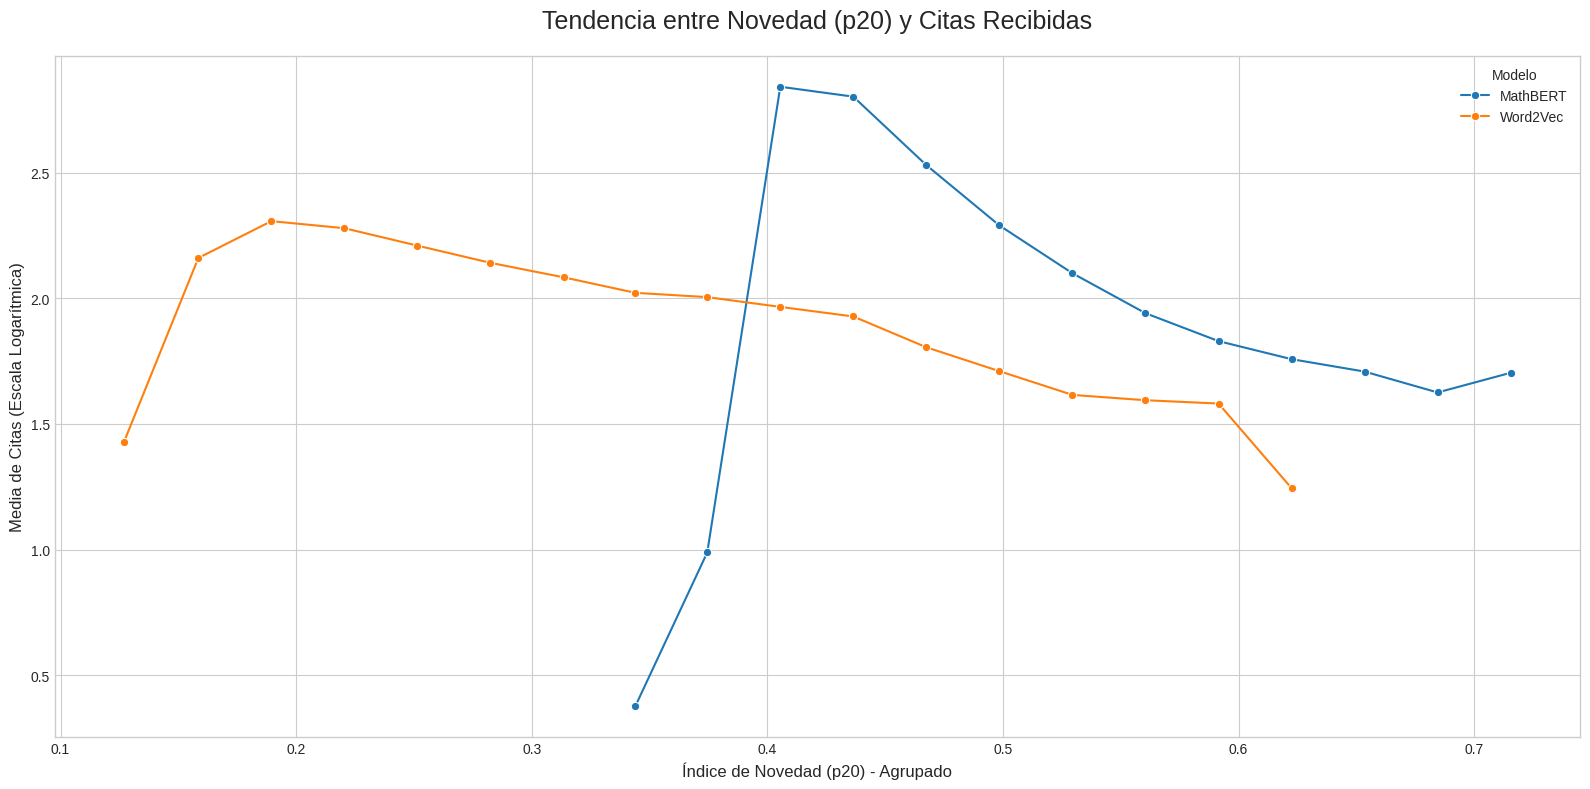

In [9]:
# --- Gráfico 3: Relación entre Novedad y Citas Recibidas (Comparativo) ---

# Preparar los datos para el análisis de tendencias
df_citas = df_completo.copy()

# Es una buena práctica usar una transformación logarítmica para las citas
# Se suma 1 (log1p) para evitar errores con artículos que tienen 0 citas
df_citas['log_citas'] = np.log1p(df_citas['citedby_count'])

# Crear "bins" o rangos de novedad para agrupar los artículos
# Dividiremos el índice de novedad en 20 rangos para ver la tendencia
df_citas['novedad_bin'] = pd.cut(df_citas['novelty_p20'], bins=20)

# Calcular la media de citas (log) para cada bin de novedad y cada modelo
df_tendencia = df_citas.groupby(['novedad_bin', 'modelo'])['log_citas'].mean().reset_index()

# Convertir los bins a un formato numérico para graficar (usando el punto medio del rango)
df_tendencia['novedad_mid'] = df_tendencia['novedad_bin'].apply(lambda x: x.mid)

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(16, 8))

# Graficar la tendencia
sns.lineplot(
    data=df_tendencia,
    x='novedad_mid',
    y='log_citas',
    hue='modelo',
    marker='o', # Añade puntos en cada bin para mayor claridad
    palette=['#1f77b4', '#ff7f0e'],
    ax=ax
)

# Títulos y etiquetas
ax.set_title('Tendencia entre Novedad (p20) y Citas Recibidas', fontsize=18, pad=20)
ax.set_xlabel('Índice de Novedad (p20) - Agrupado', fontsize=12)
ax.set_ylabel('Media de Citas (Escala Logarítmica)', fontsize=12)
ax.legend(title='Modelo')
plt.tight_layout()
 # --- GUARDAR IMAGEN 3 ---
plt.savefig(os.path.join(TMP_IMG, '03_tendencia_novedad_citas.png'), dpi=150, bbox_inches='tight')
print("✅ Gráfico 3 guardado.")
plt.show()